In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install shap scikit-learn pandas numpy matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import ttest_rel


In [ ]:
# 📌 Load Dataset
dataset_path = "/content/drive/MyDrive/Research/Final Experimentation Datasets/all_stylometry_features (2).csv"
df = pd.read_csv(dataset_path)

In [ ]:
# 📌 Drop the first column (File Names) and separate target label
df.drop(columns=[df.columns[0]], inplace=True)  # Drop file name column
X = df.drop(columns=['Label'])  # Features
y = df['Label']  # Target

In [ ]:
# 📌 Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

In [ ]:
# 📌 Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 📌 Define Feature Groups
feature_groups = {
    "Lexical Features": ['total_words', 'total_lines', 'empty_line_count', 'total_unique_words', 'lexical_density', 'entropy'],
    "Character Features": ['average_word_length', 'ratio_of_3', 'ratio_of_4', 'ratio_of_long_words', 'number_of_characters_without_spaces', 'digit_count'],
    "Punctuation Features": ['punctuation_count', 'punctuation_ratio', 'comma_count', 'dashes_count', 'open_parentheses_count', 'close_parentheses_count',
                              'semicolons_count', 'question_marks_count', 'exclamation_marks_count', 'ampersands_count', 'percentage_signs',
                              'number_of_single_quotes', 'number_of_double_quotes', 'colons_count', 'punctuation_ratio_per_para', 'average_question_marks_per_paragraph'],
    "Sentence Structure": ['white_spaces_count', 'total_sentences', 'average_sentence_length_in_words', 'average_sentence_length_in_char',
                           'min_sentence_length', 'max_sentence_length', 'average_spaces_per_sentence', 'total_question_sentences'],
    "Paragraph Features": ['total_paragraphs', 'average_paragraph_length', 'min_paragraph_length', 'max_paragraph_length',
                           'average_words_per_paragraph', 'average_sentences_per_paragraph']
}

In [ ]:
# 📌 Train Baseline Model (All Features)
baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)

In [ ]:
# 📌 Evaluate Baseline Model
baseline_scores = {
    "Accuracy": accuracy_score(y_test, y_pred_baseline),
    "Precision": precision_score(y_test, y_pred_baseline, average='weighted'),
    "Recall": recall_score(y_test, y_pred_baseline, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_baseline, average='weighted')
}
print("\n🔹 Baseline Model Performance:")
print(baseline_scores)



🔹 Baseline Model Performance:
{'Accuracy': 0.9889705882352942, 'Precision': 0.9889773464532873, 'Recall': 0.9889705882352942, 'F1-score': 0.9889706255050048}


In [ ]:
# 📌 Ablation Study
ablation_results = {}


In [ ]:
for group_name, features in feature_groups.items():
    # Remove feature group
    X_train_ablation = X_train.drop(columns=features, errors='ignore')
    X_test_ablation = X_test.drop(columns=features, errors='ignore')

    # Train Model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_ablation, y_train)
    y_pred_ablation = model.predict(X_test_ablation)

    # Evaluate Model
    ablation_scores = {
        "Accuracy": accuracy_score(y_test, y_pred_ablation),
        "Precision": precision_score(y_test, y_pred_ablation, average='weighted'),
        "Recall": recall_score(y_test, y_pred_ablation, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_ablation, average='weighted')
    }

    ablation_results[group_name] = ablation_scores
    print(f"\n🔹 Ablation Study (Removed {group_name}):")
    print(ablation_scores)


🔹 Ablation Study (Removed Lexical Features):
{'Accuracy': 0.9852941176470589, 'Precision': 0.985300875865052, 'Recall': 0.9852941176470589, 'F1-score': 0.9852941673400061}

🔹 Ablation Study (Removed Character Features):
{'Accuracy': 0.9889705882352942, 'Precision': 0.9889770486458979, 'Recall': 0.9889705882352942, 'F1-score': 0.9889704764231401}

🔹 Ablation Study (Removed Punctuation Features):
{'Accuracy': 0.9779411764705882, 'Precision': 0.977967613386541, 'Recall': 0.9779411764705882, 'F1-score': 0.9779411764705882}

🔹 Ablation Study (Removed Sentence Structure):
{'Accuracy': 0.9898897058823529, 'Precision': 0.9898912929937609, 'Recall': 0.9898897058823529, 'F1-score': 0.9898896631767187}

🔹 Ablation Study (Removed Paragraph Features):
{'Accuracy': 0.984375, 'Precision': 0.9843894152295793, 'Recall': 0.984375, 'F1-score': 0.9843747227959905}


In [ ]:
print(ablation_results)

{'Lexical Features': {'Accuracy': 0.9852941176470589, 'Precision': 0.985300875865052, 'Recall': 0.9852941176470589, 'F1-score': 0.9852941673400061}, 'Character Features': {'Accuracy': 0.9889705882352942, 'Precision': 0.9889770486458979, 'Recall': 0.9889705882352942, 'F1-score': 0.9889704764231401}, 'Punctuation Features': {'Accuracy': 0.9779411764705882, 'Precision': 0.977967613386541, 'Recall': 0.9779411764705882, 'F1-score': 0.9779411764705882}, 'Sentence Structure': {'Accuracy': 0.9898897058823529, 'Precision': 0.9898912929937609, 'Recall': 0.9898897058823529, 'F1-score': 0.9898896631767187}, 'Paragraph Features': {'Accuracy': 0.984375, 'Precision': 0.9843894152295793, 'Recall': 0.984375, 'F1-score': 0.9843747227959905}}


In [ ]:
ablation_df = pd.DataFrame(ablation_results).T  # Transpose for readability
print(ablation_df.head())  # Check DataFrame structure


                      Accuracy  Precision    Recall  F1-score
Lexical Features      0.985294   0.985301  0.985294  0.985294
Character Features    0.988971   0.988977  0.988971  0.988970
Punctuation Features  0.977941   0.977968  0.977941  0.977941
Sentence Structure    0.989890   0.989891  0.989890  0.989890
Paragraph Features    0.984375   0.984389  0.984375  0.984375


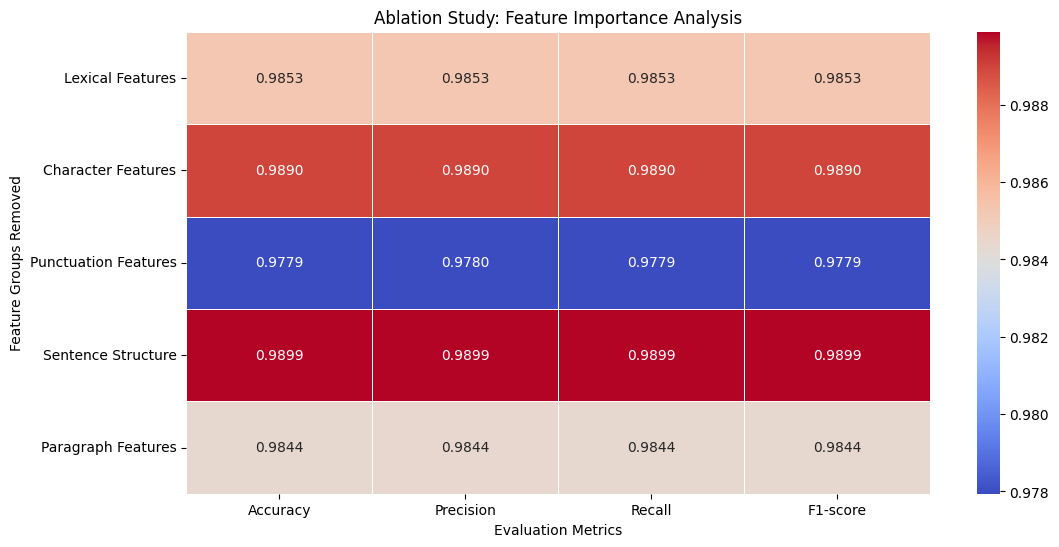

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Convert Dictionary to DataFrame
ablation_df = pd.DataFrame(ablation_results).T  # Ensure this line is executed

# 📌 Visualizing Ablation Study Results
plt.figure(figsize=(12,6))
sns.heatmap(ablation_df, annot=True, cmap='coolwarm', fmt=".4f", linewidths=0.5)
plt.title("Ablation Study: Feature Importance Analysis")
plt.xlabel("Evaluation Metrics")
plt.ylabel("Feature Groups Removed")
plt.show()


In [ ]:

# 📌 Statistical Test (Paired t-test) to Check Performance Drop
for metric in ["Accuracy", "Precision", "Recall", "F1-score"]:
    baseline_values = baseline_scores[metric]
    ablation_values = [ablation_results[group][metric] for group in feature_groups.keys()]
    stat, p_value = ttest_rel([baseline_values] * len(ablation_values), ablation_values)

    print(f"\n🔹 Statistical Significance for {metric}: p-value = {p_value:.5f}")


🔹 Statistical Significance for Accuracy: p-value = 0.15730

🔹 Statistical Significance for Precision: p-value = 0.15705

🔹 Statistical Significance for Recall: p-value = 0.15730

🔹 Statistical Significance for F1-score: p-value = 0.15729


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (4348, 43)
X_test shape: (1088, 43)


In [ ]:
print(f"shap_values shape: {np.array(shap_values).shape}")
print(f"X_test shape: {X_test.shape}")


shap_values shape: (1088, 43, 2)
X_test shape: (1088, 43)


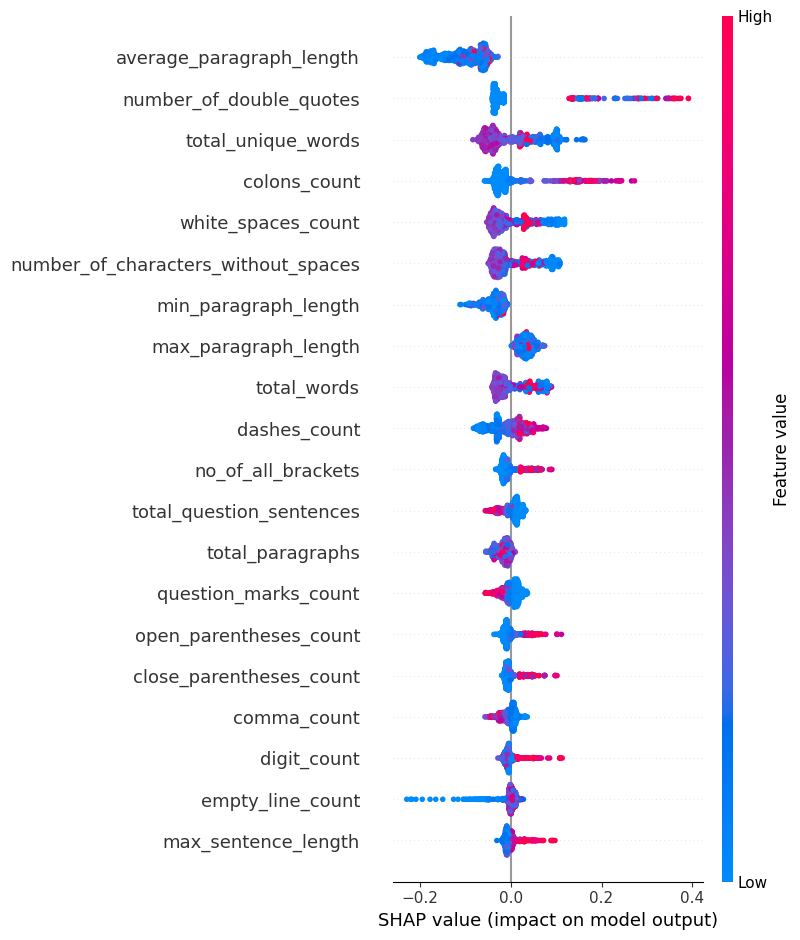

In [ ]:
shap_values_class1 = shap_values[:, :, 1]  # Extract SHAP values for class 1

plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values_class1, X_test)
